In [ ]:
import os

In [ ]:
image_path = r'/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/COCO_test2017_41k/test2017'

In [ ]:
image_files_arr = [os.path.join(image_path, f) for f in os.listdir(image_path)[:20000] if os.path.isfile(os.path.join(image_path, f))]
len(image_files_arr)

In [1]:
import os
import numpy as np
#import struct
import cv2

import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
cocotest = r'/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/COCO_test2017_41k/test2017/'
cocoval = r'/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/COCO_val2017_5k/val2017/'
flickr = r'/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/flickr30k_images/flickr30k_images/'
pywd = r'/home/rohit/PyWDUbuntu/thesis/Imgs2Detect_20imgs/'

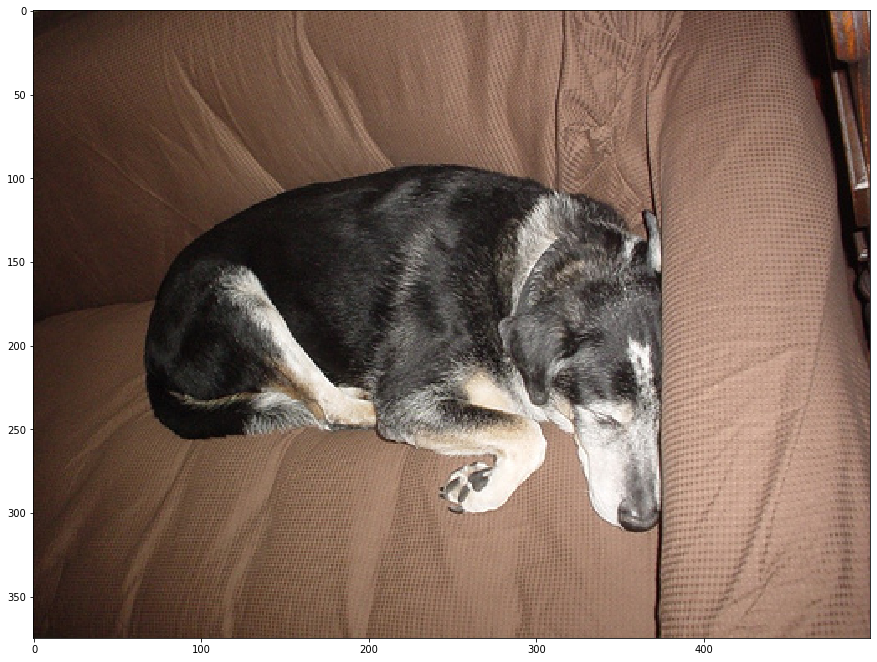

In [3]:
imgname = r'000000183838.jpg'
img = cv2.imread(cocotest + imgname, cv2.IMREAD_COLOR)
#img = cv2.imread(cocoval + imgname, cv2.IMREAD_COLOR)
#img = cv2.imread(flickr + imgname, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # cv2.COLOR_RGB2BGR  cv2.COLOR_BGR2RGB
plt.figure(figsize=(15,15))
plt.imshow(img)

In [ ]:
## query neo testing

In [ ]:

import argparse
import os
#import numpy as np
import struct
#import cv2

from py2neo import Graph

import json
import sys

In [ ]:
# neo4j access stuff
neo_uri = r"bolt://localhost:7687"
auth=(r"neo4j",r"abc")

In [ ]:
## class labels coco 80

In [ ]:
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [ ]:
input_list_for_query = [ ['dog', 'cat'], \
                 ['person', 'book'], \
                 ['person', 'car'] ]

In [ ]:
def query_neo4j_db(_key_elements_list, _in_limit):
    '''
    Queries database and returns the distinct results.
    VARIABLES PASSED:
          1) list containing the objects to find within individual image
          2) limit value for number of results from neo4j
    RETURNS:
          tuple of (return code, results as list of dictionarary items)
    Return code = 0 means all ok
    '''
    # set result as None by default
    result = None
    
    if len(_key_elements_list) not in [2, 3]:
        return(500, result) ## number of objects to search for in each image mst be 2 or 3
    
    # neo4j access stuff
    neo_uri = r"bolt://localhost:7687"
    auth=(r"neo4j",r"abc")
    
    try:
        graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))
    except:
        print(f"\n\nUnexpected ERROR connecting to neo4j.")
        print(f"\nMessage:\n{error_msg_neo_write}")
        print(f"\nFunction call return with RC=100.\n\n")
        return (100, result)
    
    ## build the query and execute
    stmt1_three_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object)--(i)--(o3:Object) ' + \
        r'WHERE o1.name = $in_obj1 AND o2.name = $in_obj2 AND o3.name = $in_onj3 ' + \
        r'RETURN DISTINCT i.name, i.dataset ' + \
        r'LIMIT $in_limit'
    stmt2_two_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object) ' + \
        r'WHERE o1.name = $in_obj1 AND o2.name = $in_obj2 ' + \
        r'RETURN DISTINCT i.name, i.dataset ' + \
        r'LIMIT $in_limit'
    try:
        graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))
        tx = graph.begin()
        if len(_key_elements_list) == 3:
            result = tx.run(stmt1_three_objects, parameters={'in_obj1': _key_elements_list[0], 'in_obj2': _key_elements_list[1], 'in_onj3': _key_elements_list[2], 'in_limit': _in_limit}).data()
        elif len(_key_elements_list) == 2: # MUST be true
            result = tx.run(stmt2_two_objects, parameters={'in_obj1': _key_elements_list[0], 'in_obj2': _key_elements_list[1], 'in_limit': _in_limit}).data()
        #tx.commit()
        #while not tx.finished():
        #    pass # tx.finished return True if the commit is complete
    except Exception as error_msg_neo_write:
        print(f"\n\nUnexpected ERROR querying neo4j.")
        print(f"\nMessage:\n{error_msg_neo_write}")
        print(f"\nFunction call return with RC=1500.\n\n")
        return (1500, result)
    # return tuple of return code and the results. RC = 0 means no errors.
    return (0, result)

In [ ]:
for each_objects_list in input_list_for_query[:1]:
    print(f"\n\n{each_objects_list}:\n{query_neo4j_db(each_objects_list, 10)}")

In [ ]:
if type([]) == list:
    print(f"yes")

In [ ]:
stmt1_3_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object)--(i)--(o3:Object) ' + \
r'WHERE o1.name = $_in_obj1 AND o2.name = $_in_obj2 AND o3.name = $_in_onj3 ' + \
r'RETURN DISTINCT i.name, i.dataset ' + \
r'LIMIT 10'
stmt2_2_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object) ' + \
r'WHERE o1.name = $_in_obj1 AND o2.name = $_in_obj2 ' + \
r'RETURN DISTINCT i.name, i.dataset ' + \
r'LIMIT 10'

In [ ]:
#MATCH (o1:Object)--(i:Image)--(o2:Object)--(i)--(o3:Object)
#WHERE o1.name = 'dog' AND o2.name = 'cat' AND o3.name = 'person'
#RETURN DISTINCT i.name, i.dataset
#LIMIT 10

In [ ]:
graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))

In [ ]:
tx = graph.begin()

In [ ]:
tx.run(stmt1_3_objects, parameters={'_in_obj1': 'dog', '_in_obj2': 'cat', '_in_onj3': 'person'}).data()

In [ ]:
def query_neo4j_db(_key_elements_list, _in_limit):
    '''
    Queries database and returns the distinct results.
    VARIABLES PASSED:
          1) list of lists. each list contains the objects to find within individual image
          2) number of results to return
    RETURNS:
          tuple of (return code, results as list of dictionarary items)
    Return code = 0 means all ok
    '''
    # neo4j access stuff
    neo_uri = r"bolt://localhost:7687"
    auth=(r"neo4j",r"abc")
    try:
        graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))
    except:
        print(f"\n\nUnexpected ERROR connecting to neo4j.")
        print(f"\nMessage:\n{error_msg_neo_write}")
        print(f"\nFunction call return with RC=100.\n\n")
        return (100, None)
    ## build the query and execute
    stmt1_three_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object)--(i)--(o3:Object) ' + \
        r'WHERE o1.name = $in_obj1 AND o2.name = $in_obj2 AND o3.name = $in_onj3 ' + \
        r'RETURN DISTINCT i.name, i.dataset ' + \
        r'LIMIT $in_limit'
    stmt2_two_objects = r'MATCH (o1:Object)--(i:Image)--(o2:Object) ' + \
        r'WHERE o1.name = $in_obj1 AND o2.name = $in_obj2 ' + \
        r'RETURN DISTINCT i.name, i.dataset ' + \
        r'LIMIT $in_limit'
    try:
        graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))
        for each_entry in _key_elements_list:
            if len(each_entry) in [2, 3]:
                tx = graph.begin()
                if len(each_entry) == 3:
                    result = tx.run(stmt1_three_objects, parameters={'in_obj1': _key_elements_list[0], 'in_obj2': _key_elements_list[1], 'in_onj3': _key_elements_list[2], 'in_limit': _in_limit}).data()
                elif len(each_entry) == 2:
                    result = tx.run(stmt2_two_objects, parameters={'in_obj1': _key_elements_list[0], '_n_obj2': _key_elements_list[1], 'in_limit': _in_limit}).data()
            else:
                return(500, None) ## number of objects to search for in each image mst be 2 or 3
                rc = 500
                result = None 
            #tx.commit()
            #while not tx.finished():
            #    pass # tx.finished return True if the commit is complete
    except Exception as error_msg_neo_write:
        print(f"\n\nUnexpected ERROR querying neo4j.")
        print(f"\nMessage:\n{error_msg_neo_write}")
        print(f"\nFunction call return with RC=1500.\n\n")
        rc = 1500
    # return tuple of return code and the results. RC = 0 means no errors.
    return (rc, result)

# Verify the coco test, coco val, flickr30k, processing job output files are correct.
# Checking that the image entry is unique

In [ ]:
import pandas as pd
import numpy as np
import json
import os

### COCO TEST 2017 has 40670 images in original dataset

In [ ]:
!ls '/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/COCO_test2017_41k/test2017' | wc -l

### FLICKR20K has 31783 images in original dataset

In [ ]:
!ls '/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/flickr30k_images/flickr30k_images' | wc -l

### COCO VAL 2017 has 5000 images in original dataset

In [ ]:
!ls '/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/COCO_val2017_5k/val2017' | wc -l

In [ ]:
abc = r'/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_35k_40k'

In [ ]:
abc.split('op4neo_1_')[-1]

In [ ]:
# COCO TEST 2017
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_1_10k     = 97 files
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_10k_15k   = 98 files
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_15k_20k   = 48 files
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_20k_25k   = 50 files
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_25k_35k   = 98 files
# /home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_35k_40k   = 110 files

# COCO VAL 2017
# /home/rohit/PyWDUbuntu/thesis/COCO_val2017_5k_images_op4neo                = 40 files

# FLICKR30K
# /home/rohit/PyWDUbuntu/thesis/flickr30k_images_op4neo_corrected            = 124 files

jobfolders = ['/home/rohit/PyWDUbuntu/thesis/COCO_val2017_5k_images_op4neo', '/home/rohit/PyWDUbuntu/thesis/flickr30k_images_op4neo_corrected', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_1_10k', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_10k_15k', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_15k_20k', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_20k_25k', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_25k_35k', '/home/rohit/PyWDUbuntu/thesis/coco_test_2017_40k_images_op4neo_1_35k_40k']

In [ ]:
onlyimgs = []
onlyimgs_1 = []
filesprocessed = 0
for each_folder in jobfolders:#[:1]:
    if each_folder[-1] != r"/":
        each_folder += r"/"
    if not os.path.isdir(each_folder):
        print(f"FATAL ERROR: Input for iploc parameter is not an existing directory. Breaking out....")
        break
    # make array of ALL files in the input directory
    each_folder_files = [os.path.join(each_folder, f) for f in os.listdir(each_folder) if os.path.isfile(os.path.join(each_folder, f))]
    for each_file in each_folder_files:#[:1]:
        with open(each_file, "r") as saved_file:
            neo_data = json.load(saved_file)
            for each_entry in neo_data:
                onlyimgs.append(each_entry["img"])
                #onlyimgs_1.append(each_entry["img"] + each_folder.split('op4neo_1')[-1][:-1])
                onlyimgs_1.append( [ each_entry["img"] , each_folder.split('op4neo_1')[-1][:-1] ] )
        filesprocessed += 1
print(f"filesprocessed={filesprocessed}\nonlyimgs length = {len(onlyimgs)}\nonlyimgs_1 length = {len(onlyimgs_1)}")

In [ ]:
df = pd.DataFrame(onlyimgs)
df1 = pd.DataFrame(onlyimgs_1)

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
df[0].nunique()

In [ ]:
df[0].count()

In [ ]:
df1.head()

In [ ]:
len(df1)

In [ ]:
df1[0].nunique()

In [ ]:
df1[0].count()

In [ ]:
df2 = df1.copy(deep=True)

In [ ]:
df2.duplicated(subset=[0], keep=False) 

In [ ]:
df2[df2.duplicated(subset=[0], keep=False) ]

In [ ]:
df1[df1[0] == '000000459163.jpg']

## Double checked - no duplicates of the file name across COCO TEST, COCO VAL and FLICKR30K

In [ ]:
df2[df2.duplicated(subset=[0], keep=False) ][1].unique()

In [ ]:
dftemp = pd.DataFrame(np.arange(20).reshape(10,-1))

In [ ]:
dftemp

In [ ]:
dftemp.loc[1,0] = 100
dftemp.loc[3,0] = 100
dftemp.loc[6,0] = 100

In [ ]:
dftemp

In [ ]:
dftemp[dftemp[0] == 100]

In [ ]:
dftemp[dftemp[0] == 100][1].unique()

In [ ]:
import pandas as pd
import json
import os

## flickr30k directory had 31783 images
#### "/media/rohit/DATA/EverythingD/01SRH-BDBA Acads/Thesis/StoryGenerator/Data/flickr30k_images/flickr30k_images"

In [ ]:
iploc = r"/home/rohit/PyWDUbuntu/thesis/flickr30k_images_op4neo"

In [ ]:
if iploc[-1] != r"/":
    iploc += r"/"
if not os.path.isdir(iploc):
    print(f"FATAL ERROR: Input for iploc parameter is not an existing directory.\nExiting with RC=100")
print(f"\niploc={iploc}")

In [ ]:
# make array of ALL files in the input directory
neo_arr_files = [os.path.join(iploc, f) for f in os.listdir(iploc) if os.path.isfile(os.path.join(iploc, f))]
neo_arr_files_count = len(neo_arr_files)

In [ ]:
print(f"\nneo_arr_files_count={neo_arr_files_count}")

In [ ]:
onlyimgs = []
filesprocessed = 0
for each_file in neo_arr_files: #[15:16]:
    with open(each_file, "r") as saved_file:
        neo_data = json.load(saved_file)
        #print(f"type = {type(neo_data)}\n{neo_data}")
        for each_entry in neo_data:
            onlyimgs.append(each_entry["img"])
    filesprocessed += 1
print(f"filesprocessed={filesprocessed}\nonlyimgs length = {len(onlyimgs)}")

In [ ]:
df = pd.DataFrame(onlyimgs)

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
df[0].nunique()

In [ ]:
df[0].count()

In [ ]:
opfilelocneo = r"home/rohit/PyWDUbuntu/thesis/Imgs2Detect_op4neo"
if opfilelocneo[-1] != r"/":
    opfilelocneo += r"/"

print(f"{opfilelocneo}")

In [ ]:
opfilelocneo = r"home/rohit/PyWDUbuntu/thesis/Imgs2Detect_op4neo/"
if opfilelocneo[-1] != r"/":
    opfilelocneo += r"/"

print(f"{opfilelocneo}")

In [ ]:
import os

In [ ]:
opfilelocneo = r"/home/rohit/PyWDUbuntu/thesis/Imgs2Detect_op4neo"

if opfilelocneo[-1] != r"/":
    opfilelocneo += r"/"
print(f"{opfilelocneo}\n")

print(f"exists = {os.path.exists(opfilelocneo)}")
print(f"dir = {os.path.isdir(opfilelocneo)}")
print(f"file = {os.path.isfile(opfilelocneo)}")

In [ ]:
try:
    if not os.path.isdir(opfilelocneo):
        os.makedirs(opfilelocneo) # does not exist, make it
except:
    print(f"FATAL ERROR creating output directory")

In [ ]:
print(f"exists = {os.path.exists(opfilelocneo)}")
print(f"dir = {os.path.isdir(opfilelocneo)}")
print(f"file = {os.path.isfile(opfilelocneo)}")

In [ ]:
def ftotalout():
    print(f"Ran ftotalout")
class Outer():
    def of1(self):
        print(f"Ran of1")
    def run_if1(self):
        self.Inner.if1(self)
    class Inner():
        def if1(self):
            print(f"Ran if1")
            print(f"Calling ftotalout")
            ftotalout()
            print(f"Calling if2")
            self.Inner.if2(self)
        def if2(self):
            print(f"Ran if2")

In [ ]:
o = Outer()

In [ ]:
o.run_if1()

In [ ]:
o.of1()

In [ ]:
o.if1()

In [ ]:
o.Inner.if1()

In [ ]:
# multiprocessing using task and queue
# https://pymotw.com/2/multiprocessing/communication.html

In [ ]:
import multiprocessing, os

In [ ]:
image_path = r"/home/rohit/PyWDUbuntu/thesis/Imgs2Detect"
image_files_arr = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

In [ ]:
len(image_files_arr)

In [ ]:
nfts = 2
num_jobs = int(len(image_files_arr) / nfts + ( (len(image_files_arr) % nfts)!=0 ) * 1)
print(f"{num_jobs}")

In [ ]:
image_files_arr

In [ ]:
if num_jobs > 1:
    for i in range(num_jobs - 1):
        print(f"job {i+1} =\n{image_files_arr[i*nfts : (i+1)*nfts]}")
print(f"job {num_jobs} =\n{image_files_arr[(num_jobs-1)*nfts : ]}")

In [ ]:
multiprocessing.cpu_count() - 1

In [ ]:
class Consumer(multiprocessing.Process):
    def __init__(self, task_queue, result_queue):
        multiprocessing.Process.__init__(self)
        self.task_queue = task_queue
        self.result_queue = result_queue

    def run(self):
        proc_name = self.name
        while True:
            next_task = self.task_queue.get()
            if next_task is None:
                # Poison pill means shutdown
                print(f"Exiting process {proc_name}")
                self.task_queue.task_done()
                break
            print(f"Process {proc_name} picked job = {next_task.job_num}")
            answer = next_task()
            self.task_queue.task_done()
            self.result_queue.put(answer)
        return

In [ ]:
class Task(object):
    def __init__(self, _job_num, _data_arr):
        self.job_num = _job_num
        self.data_arr = _data_arr
    def __call__(self):
        ans = []
        for each_entry in self.data_arr:
            ans.append("j" + str(self.job_num) + "_" + each_entry)
        return ans
    def __str__(self):
        return '%s * %s' % (self.a, self.b)

In [ ]:
if __name__ == '__main__':
    
    image_path = r"/home/rohit/PyWDUbuntu/thesis/Imgs2Detect"
    image_files_arr = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]
    nfts = 2 # num of files per task

    # Establish communication queues
    tasks = multiprocessing.JoinableQueue()
    results = multiprocessing.Queue()
    
    # Start consumers
    num_consumers = multiprocessing.cpu_count() - 1
    print(f"Creating {num_consumers} consumers")
    consumers = [ Consumer(tasks, results) for i in range(num_consumers) ]
    for w in consumers:
        w.start()
    
    # Enqueue jobs
    num_jobs = int(len(image_files_arr) / nfts + ( (len(image_files_arr) % nfts)!=0 ) * 1)
    if num_jobs > 1:
        for i in range(num_jobs - 1):
            #print(f"job {i+1} =\n{image_files_arr[i*nfts : (i+1)*nfts]}")
            tasks.put(Task(i+1, image_files_arr[i*nfts : (i+1)*nfts]))
    #print(f"job {num_jobs} =\n{image_files_arr[(num_jobs-1)*nfts : ]}")
    tasks.put(Task(num_jobs, image_files_arr[(num_jobs-1)*nfts : ]))
    
    # Add a poison pill for each consumer
    for i in range(num_consumers):
        tasks.put(None)

    # Wait for all of the tasks to finish
    tasks.join()
    print(f"\n\nAll consumers rejoined\n\n")
    
    # Start printing results
    for i in range(num_jobs):
        result = results.get()
        print(f"Job {i+1} result=\n{result}")

In [ ]:
import os

In [ ]:
with open("dAta.json", "w") as f:
    print(f"{f}")

In [ ]:
f.name

In [ ]:
os.path.realpath(f.name)

In [ ]:
import os

In [ ]:
image_path = r"/home/rohit/PyWDUbuntu/DA4_1/Imgs2Detect/"

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
onlyfiles = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

In [ ]:
onlyfiles

In [ ]:
print(os.path.basename(onlyfiles[0]))

In [ ]:
print(os.path.basename(image_path))

In [ ]:
ar1 = []
ar1.append({"img_name": os.path.basename(onlyfiles[0]) , "detections": [] } )

In [ ]:
ar1

In [ ]:
ar1[0]

In [ ]:
ar1[0]["detections"]

In [ ]:
ar1[0]["detections"].append(["dog",0.456])

In [ ]:
ar1

In [ ]:
d = {"a": "abcds", "b": {"b1": 1, "b2": 2, "b3": "rohit", "b4": "bewoor"}}

In [ ]:
d["b"]["b3"]

In [ ]:
d = [{"img_name": "img1.jpg", "detections": [["label1", "label1_score"], ["label2", "label2_score"] ] } , {"img_name": "img2.jpg", "detections": [["label3", "label3_score"], ["label4", "label4_score"] ] } ]

In [ ]:
for eachd in d[0:1]:
    print(f"{d}")

In [ ]:
for idx, eachd in enumerate(d):
    print(f'{idx + 1} : image = {eachd["img_name"]}')
    for eachdet in eachd["detections"]:
        print(f'class = {eachdet[0]}\tscore = {eachdet[1]}')
    print(f"\n\n")

In [ ]:
round(1.445324, 3)

In [ ]:
import numpy as np

In [ ]:
ar1 = np.array(np.ones((2,3)))

In [ ]:
ar1.shape

In [ ]:
ar2 = np.expand_dims(ar1, 0)

In [ ]:
ar2.shape

In [ ]:
id(ar2)

In [ ]:
ar3 = ar2.copy()

In [ ]:
id(ar3)

In [ ]:
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras import backend as K

In [ ]:
l1 = [[1., 2, 3], [4, 5, 6]]

In [ ]:
#ar1 = np.array(np.ones((1, 2, 3, 1)))
#ar1 = np.array(np.ones((2, 3)))
ar1 = np.array(l1)

In [ ]:
ar1

In [ ]:
ar1.shape

In [ ]:
ar1 = np.expand_dims(ar1, 0)

In [ ]:
ar1.shape

In [ ]:
ar1 = np.expand_dims(ar1, 3)

In [ ]:
ar1.shape

In [ ]:
ar1

In [ ]:
type(ar1)

In [ ]:
ar2 = K.variable(value=ar1)

In [ ]:
type(ar2)

In [ ]:
ar2

In [ ]:
ar2.shape

In [ ]:
ar2 = ZeroPadding2D(((1,0),(1,0)))(ar2)

In [ ]:
ar2

In [ ]:
ar3 = K.eval(ar2)

In [ ]:
type(ar3)

In [ ]:
ar3

In [ ]:
import json

neoarr = [{"img": "img1.jpg", "det": [["label1", "label1_score"], ["label2", "label2_score"] ] } , {"img": "img2.jpg", "det": [["label3", "label3_score"], ["label4", "label4_score"] ] } ]
print(f"type(neoarr) = {type(neoarr)}\nneoarr =\n{neoarr}")
with open("data.json", "w") as some_file:
    json.dump(neoarr, some_file)
del(neoarr)

with open("data.json", "r") as saved_file:
    neoarr = json.load(saved_file)
print(f"type(neoarr) = {type(neoarr)}\nneoarr =\n{neoarr}")

In [ ]:
#from py2neo.data import Node, Relationship
from py2neo import Graph

In [ ]:
graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))

In [ ]:
type(graph)

In [ ]:
graph

In [ ]:
tx = graph.begin()

In [ ]:
tx.finished()

In [ ]:
imgFile = "img1.jpg"
objDetected = "person"
detScore1 = 98.00
detScore2 = 50.00

In [ ]:
stmt1 = r'MERGE (:Image {name: $_in_img_name})'
stmt2 = r'MERGE (:Object {name: $_in_obj_det})'
stmt3=r'MATCH (i1:Image{name: $_in_img_name}) MATCH (o1:Object{name: $_in_obj_det}) CREATE (i1)-[:HAS{score: $_in_det_score}]->(o1)'
stmt4=r'MATCH (i1:Image{name: $_in_img_name}) MATCH (o1:Object{name: $_in_obj_det}) CREATE (i1)-[:HAS{score: $_in_det_score}]->(o1)'

In [ ]:
print(f"stmt1={stmt1}\nstmt2={stmt2}\nstmt3={stmt3}\nstmt4={stmt4}")

In [ ]:
#tx.run(stmt1, parameters={"_in_img_name": in_imgFile})
tx.run(stmt1, parameters={"_in_img_name": imgFile})
tx.run(stmt2, parameters={"_in_obj_det": objDetected})
tx.run(stmt3, parameters={"_in_img_name": imgFile, "_in_obj_det": objDetected, "_in_det_score": detScore1})
tx.run(stmt4, parameters={"_in_img_name": imgFile, "_in_obj_det": objDetected, "_in_det_score": detScore2})

In [ ]:
tx.commit()

In [ ]:
tx.finished()

In [ ]:
stmt1 = 'MERGE (:Image {name: "' + in_imgFile + '"})'
stmt2 = 'MERGE (:Object {name: "' + in_objDetected + '"})'
stmt3 = 'MATCH (i1:Image{name: "' +  \
in_imgFile +  \
'"}) MATCH (o1:Object{name: "'+  \
in_objDetected +  \
'"}) CREATE (i1)-[:HAS{score: ' +  \
str(in_detScore1) +  \
'}]->(o1)'

stmt4 = 'MATCH (i1:Image{name: "' +  \
in_imgFile +  \
'"}) MATCH (o1:Object{name: "'+  \
in_objDetected +  \
'"}) CREATE (i1)-[:HAS{score: ' +  \
str(in_detScore2) +  \
'}]->(o1)'

In [ ]:
print(f"stmt1={stmt1}\nstmt2={stmt2}\nstmt3={stmt3}\nstmt4={stmt4}")

In [ ]:
tx.run(stmt1, parameters=None)
tx.run(stmt2, parameters=None)
tx.run(stmt3, parameters=None)
tx.run(stmt4, parameters=None)

In [ ]:
tx.commit()

In [ ]:
tx.finished()

In [ ]:
#stmt1_merge_img_node = "MERGE (:Image {name: {in_imgFile}})"
#stmt2_merge_obj_node = "MERGE (:Object {name: {in_objDetected}})"
#stmt3_rel_img_has_obj = "MATCH (i:Image{name: {in_imgFile}}) " +
#                       "MATCH (o:Object{name: {in_objDetected}}) " +
#                       "CREATE (i)-[:HAS{score: {in_detScore}}]->(o)"
#stmt3_rel_img_has_obj = "MATCH (i:Image{name: {in_imgFile}}, o:Object{name: {in_objDetected}}) CREATE (i)-[:HAS{score: {in_detScore}}]->(o)"

In [ ]:
#tx.create(stmt3_rel_img_has_obj, {"in_imgFile": "img1.jpg", "in_objDetected": "person", "in_detScore": 98.45})

In [ ]:
from py2neo.data import Node, Relationship
from py2neo import Graph

In [ ]:
graph = Graph(uri="bolt://localhost:7687",auth=("neo4j","abc"))

In [ ]:
type(graph)

In [ ]:
graph

In [ ]:
n_img = Node("Image", name="img1.jpg", size=1234)
n_obj1 = Node("Object", name="person")
n_obj2 = Node("Object", name="table")
rel_has_1 = Relationship(n_img, "HAS", n_obj1)

In [ ]:
graph.create(rel_has_1)

In [ ]:
help(graph.create)

In [ ]:
help(graph)

In [ ]:
import sys

In [ ]:
t1 = ("a", 123, 45.56)
v1, v2, v3 = t1

In [ ]:
print(f"v1 = {v1} = {sys.getsizeof(v1)} bytes")
print(f"v2 = {v2} = {sys.getsizeof(v2)} bytes")
print(f"v3 = {v3} = {sys.getsizeof(v3)} bytes")
print(f"t1 = {t1} = {sys.getsizeof(t1)} bytes")

In [ ]:
def add(_in):
    a, b = _in
    return a+b

In [ ]:
ans = map(add, [(1, 2), (3, 4)])

In [ ]:
list(ans)

In [ ]:
## load directly from string - using json.loads - note string to be of form1

In [1]:
import json
import ast

In [2]:
objarrfile = r"/home/rohit/PyWDUbuntu/thesis/queryDb/query_db_input_test.txt"

In [2]:
## only the first one works
testdatastr1 = '[ ["dog", "cat"], ["person", "book"], ["person", "car"] ]'
testdatastr2 = "[ ['dog', 'cat'], ['person', 'book'], ['person', 'car'] ]"

In [3]:
testdatastr1

'[ ["dog", "cat"], ["person", "book"], ["person", "car"] ]'

In [4]:
testdatastr2

"[ ['dog', 'cat'], ['person', 'book'], ['person', 'car'] ]"

In [5]:
testdata1 = json.loads(testdatastr1)
testdata2 = json.loads(testdatastr2)

JSONDecodeError: Expecting value: line 1 column 4 (char 3)

In [6]:
type(testdata1)

list

In [7]:
type(testdata2)

NameError: name 'testdata2' is not defined

In [8]:
testdata1

[['dog', 'cat'], ['person', 'book'], ['person', 'car']]

In [9]:
testdata2

NameError: name 'testdata2' is not defined

In [ ]:
## load directly from file - using json.load - make sure the strings in the file are in DOUBLE QUOTES
# [ ["dog", "cat"], ["person", "book"], ["person", "car"] ]  -- WORKS
# [ ['dog', 'cat'], ['person', 'book'], ['person', 'car'] ]  -- FAILS

In [1]:
import json

In [2]:
objarrfile_double = r"/home/rohit/PyWDUbuntu/thesis/queryDb/query_db_input_test_dblquote.txt"
objarrfile_single = r"/home/rohit/PyWDUbuntu/thesis/queryDb/query_db_input_test_singlequote.txt"

In [3]:
#with open(objarrfile, 'w') as f:
#    key_elements_list = json.dump(testdata, f)

In [4]:
key_elements_list_dbl = None
try:
    with open(objarrfile_double, 'r') as f:
        key_elements_list_dbl = json.load(f)
except:
    print(f"\nProblem loading data from the file DOUBLE. Exiting with return code 410.")
key_elements_list_single = None
try:
    with open(objarrfile_single, 'r') as f:
        key_elements_list_single = json.load(f)
except:
    print(f"\nProblem loading data from the file SINGLE. Exiting with return code 410.")


Problem loading data from the file SINGLE. Exiting with return code 410.


In [5]:
key_elements_list_dbl

[['dog', 'cat'], ['person', 'book'], ['person', 'car']]

In [6]:
key_elements_list_single

In [1]:
ds_inf_cmd_fixed = "deepspeech " + \
    "--model /home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.pbmm " + \
    "--scorer /home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.scorer " + \
    "--audio " #/home/rohit/PyWDUbuntu/thesis/audio/wavs/input1.wav - this last part will be added on the fly
ds_inf_cmd = ds_inf_cmd_fixed + "each_wav_file.wav"
print(f"{ds_inf_cmd}")

deepspeech --model /home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.pbmm --scorer /home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.scorer --audio each_wav_file.wav


In [2]:
ds_inf_cmd.split(' ')

['deepspeech',
 '--model',
 '/home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.pbmm',
 '--scorer',
 '/home/rohit/deepspeech/pretrained/v073/deepspeech-0.7.3-models.scorer',
 '--audio',
 'each_wav_file.wav']

In [1]:
#STEMMING and POS TAGGING

## stemmiing: https://pythonprogramming.net/stemming-nltk-tutorial/

## pos tagging: Tokenize and tag some text: https://www.nltk.org/
##>>> import nltk
##>>> sentence = """At eight o'clock on Thursday morning
##... Arthur didn't feel very good."""
##>>> tokens = nltk.word_tokenize(sentence)
##>>> tokens
##['At', 'eight', "o'clock", 'on', 'Thursday', 'morning',
##'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
##>>> tagged = nltk.pos_tag(tokens)
##>>> tagged[0:6]
##[('At', 'IN'), ('eight', 'CD'), ("o'clock", 'JJ'), ('on', 'IN'),
##('Thursday', 'NNP'), ('morning', 'NN')]

In [2]:
import nltk

In [3]:
nltk.data.path

['/home/rohit/nltk_data',
 '/home/rohit/anaconda3/envs/ce6idelements1/nltk_data',
 '/home/rohit/anaconda3/envs/ce6idelements1/share/nltk_data',
 '/home/rohit/anaconda3/envs/ce6idelements1/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

In [4]:
#from nltk import sent_tokenize, word_tokenize
#from nltk.stem import PorterStemmer
#from nltk.tokenize import sent_tokenize, word_tokenize

In [5]:
ps = nltk.stem.PorterStemmer()

In [6]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [7]:
arr = ['i want a story about a car on the road a child plays with a toy',
       'generate a story about persons walking on the street a truck is on the road']

In [8]:
result = []

In [9]:
# tokenize the words

In [10]:
tokens = nltk.tokenize.word_tokenize(arr[1])

In [11]:
tokens

['generate',
 'a',
 'story',
 'about',
 'persons',
 'walking',
 'on',
 'the',
 'street',
 'a',
 'truck',
 'is',
 'on',
 'the',
 'road']

In [14]:
tokens_no_stop = [w for w in tokens if w not in stop_words]

In [15]:
tokens_no_stop

['generate', 'story', 'persons', 'walking', 'street', 'truck', 'road']

In [16]:
tokens_stemmed = []
for token in tokens_no_stop:
    tokens_stemmed.append(ps.stem(token))

In [17]:
tokens_stemmed

['gener', 'stori', 'person', 'walk', 'street', 'truck', 'road']

In [9]:
for entry in arr:
    result.append(sent_tokenize(entry))

In [10]:
result

[['i want a story about a car on the road a child plays with a toy'],
 ['generate a story about persons walking on the street a truck is on the road']]

In [18]:
for word in ['story', 'stories', 'storied']:
    print(f"{(word, ps.stem(word))}")

('story', 'stori')
('stories', 'stori')
('storied', 'stori')


In [19]:
for word in ['run', 'running', 'ran', 'runner']:
    print(f"{(word, ps.stem(word))}")

('run', 'run')
('running', 'run')
('ran', 'ran')
('runner', 'runner')


In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [2]:
arr = ['i want a story about a car on the road a child plays with a toy',
       'generate a story about persons walking on the street a truck is on the road']

In [3]:
doc = nlp("This is a sentence. This is another sentence.")
for sent in doc.sents:
    print(sent.text)

This is a sentence.
This is another sentence.


In [3]:
doc = nlp(arr[0])
for sent in doc.sents:
    print(sent.text)

i want a story about a car on the road a child plays with a toy


In [5]:
#Text: The original word text.
#Lemma: The base form of the word.
#POS: The simple UPOS part-of-speech tag.
#Tag: The detailed part-of-speech tag.
#Dep: Syntactic dependency, i.e. the relation between tokens.
#Shape: The word shape – capitalization, punctuation, digits.
#is alpha: Is the token an alpha character?
#is stop: Is the token part of a stop list, i.e. the most common words of the language?

# text  lemma   pos  tag  dep  shape  is_alpha  is_stop

In [8]:
for token in doc:
#    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#            token.shape_, token.is_alpha, token.is_stop)
    print(f"{token.text:10}\t{token.lemma_:10}\t{token.pos_}\t{token.tag_}\t{token.dep_}\t{token.shape_}\t{token.is_alpha}\t{token.is_stop}")

generate  	generate  	VERB	VB	ROOT	xxxx	True	False
a         	a         	DET	DT	det	x	True	True
story     	story     	NOUN	NN	dobj	xxxx	True	False
about     	about     	ADP	IN	prep	xxxx	True	True
persons   	person    	NOUN	NNS	pobj	xxxx	True	False
walking   	walk      	VERB	VBG	acl	xxxx	True	False
on        	on        	ADP	IN	prep	xx	True	True
the       	the       	DET	DT	det	xxx	True	True
street    	street    	NOUN	NN	pobj	xxxx	True	False
a         	a         	DET	DT	det	x	True	True
truck     	truck     	NOUN	NN	nsubj	xxxx	True	False
is        	be        	AUX	VBZ	ROOT	xx	True	True
on        	on        	ADP	IN	prep	xx	True	True
the       	the       	DET	DT	det	xxx	True	True
road      	road      	NOUN	NN	pobj	xxxx	True	False


In [9]:
doc = nlp(arr[1])
for sent in doc.sents:
    print(sent.text)

generate a story about persons walking on the street
a truck is on the road


In [10]:
for token in doc:
#    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#            token.shape_, token.is_alpha, token.is_stop)
    print(f"{token.text:10}\t{token.lemma_:10}\t{token.pos_}\t{token.tag_}\t{token.dep_}\t{token.shape_}\t{token.is_alpha}\t{token.is_stop}")

generate  	generate  	VERB	VB	ROOT	xxxx	True	False
a         	a         	DET	DT	det	x	True	True
story     	story     	NOUN	NN	dobj	xxxx	True	False
about     	about     	ADP	IN	prep	xxxx	True	True
persons   	person    	NOUN	NNS	pobj	xxxx	True	False
walking   	walk      	VERB	VBG	acl	xxxx	True	False
on        	on        	ADP	IN	prep	xx	True	True
the       	the       	DET	DT	det	xxx	True	True
street    	street    	NOUN	NN	pobj	xxxx	True	False
a         	a         	DET	DT	det	x	True	True
truck     	truck     	NOUN	NN	nsubj	xxxx	True	False
is        	be        	AUX	VBZ	ROOT	xx	True	True
on        	on        	ADP	IN	prep	xx	True	True
the       	the       	DET	DT	det	xxx	True	True
road      	road      	NOUN	NN	pobj	xxxx	True	False


In [1]:
## Spacy - remove stop words from sentences and POS tag

In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import json
nlp = spacy.load('en_core_web_lg')

In [2]:
## sentences to process
sentences_orig = ['i want a story about a car on the road a child plays with a toy',
       'generate a story about persons walking on the street a truck is on the road']

# create various arrays required
# nlp documents array - one per original sentence
docs = [nlp(each_sentence) for each_sentence in sentences_orig]
# array for tokens of the original sentences - create list of word tokens for each sentence doc
sentences_words_list = [[token.text for token in doc] for doc in docs]
# array for tokens of original sentence after removing stop words
sentences_words_list = [[token.text for token in doc] for doc in docs]
# create list of word tokens for each sentence doc WITHOUT STOP WORDS
sentences_words_list_no_stop = [[word for word in words_list if not nlp.vocab[word].is_stop ] for words_list in sentences_words_list]
# sentences array with stop words removed
sentences_no_stop = [' '.join(words_list) for words_list in sentences_words_list_no_stop]

In [3]:
sentences_orig

['i want a story about a car on the road a child plays with a toy',
 'generate a story about persons walking on the street a truck is on the road']

In [4]:
docs

[i want a story about a car on the road a child plays with a toy,
 generate a story about persons walking on the street a truck is on the road]

In [5]:
sentences_words_list

[['i',
  'want',
  'a',
  'story',
  'about',
  'a',
  'car',
  'on',
  'the',
  'road',
  'a',
  'child',
  'plays',
  'with',
  'a',
  'toy'],
 ['generate',
  'a',
  'story',
  'about',
  'persons',
  'walking',
  'on',
  'the',
  'street',
  'a',
  'truck',
  'is',
  'on',
  'the',
  'road']]

In [6]:
sentences_words_list_no_stop

[['want', 'story', 'car', 'road', 'child', 'plays', 'toy'],
 ['generate', 'story', 'persons', 'walking', 'street', 'truck', 'road']]

In [7]:
sentences_no_stop

['want story car road child plays toy',
 'generate story persons walking street truck road']

In [8]:
#Text: The original word text.
#Lemma: The base form of the word.
#POS: The simple UPOS part-of-speech tag.
#Tag: The detailed part-of-speech tag.
#Dep: Syntactic dependency, i.e. the relation between tokens.
#Shape: The word shape – capitalization, punctuation, digits.
#is alpha: Is the token an alpha character?
#is stop: Is the token part of a stop list, i.e. the most common words of the language?

# text  lemma   pos  tag  dep  shape  is_alpha  is_stop
# accessed as token.text etc.

In [10]:
## pos extraction
# pos data for all non stop-words
#pos_info = [ [] for _ in range(len(sentences_no_stop))]
#for idx1, words_list in enumerate(sentences_words_list_no_stop):
#    for idx2, each_word in enumerate(words_list):
#        pos_info[idx1].append({})
pos_info = [[{} for seach_word in words_list] for words_list in sentences_words_list_no_stop]
for idx1, each_sent_no_stop in enumerate(sentences_no_stop):
    doc = nlp(each_sent_no_stop)
    for idx2, token in enumerate(doc):
        pos_info[idx1][idx2]['text']    = token.text
        pos_info[idx1][idx2]['lemma_']   = token.lemma_
        pos_info[idx1][idx2]['pos_']     = token.pos_
        pos_info[idx1][idx2]['tag_']     = token.tag_
        pos_info[idx1][idx2]['dep_']     = token.dep_
        pos_info[idx1][idx2]['shape_']   = token.shape_
        pos_info[idx1][idx2]['is_alpha'] = token.is_alpha
        pos_info[idx1][idx2]['is_stop']  = token.is_stop
#token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#token.shape_, token.is_alpha, token.is_stop)

In [11]:
pos_info

[[{'text': 'want',
   'lemma_': 'want',
   'pos_': 'VERB',
   'tag_': 'VBP',
   'dep_': 'ROOT',
   'shape_': 'xxxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'story',
   'lemma_': 'story',
   'pos_': 'NOUN',
   'tag_': 'NN',
   'dep_': 'compound',
   'shape_': 'xxxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'car',
   'lemma_': 'car',
   'pos_': 'NOUN',
   'tag_': 'NN',
   'dep_': 'compound',
   'shape_': 'xxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'road',
   'lemma_': 'road',
   'pos_': 'NOUN',
   'tag_': 'NN',
   'dep_': 'compound',
   'shape_': 'xxxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'child',
   'lemma_': 'child',
   'pos_': 'NOUN',
   'tag_': 'NN',
   'dep_': 'nsubj',
   'shape_': 'xxxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'plays',
   'lemma_': 'play',
   'pos_': 'VERB',
   'tag_': 'VBZ',
   'dep_': 'ccomp',
   'shape_': 'xxxx',
   'is_alpha': True,
   'is_stop': False},
  {'text': 'toy',
   'lemma_

In [22]:
all_words_pos_info_file = r'/home/rohit/PyWDUbuntu/thesis/IdElements/all_words_pos_info_1.txt'
# [ ["clock", "book"], ["person", "bird", "clock"] ]
key_elements_output_file = r'/home/rohit/PyWDUbuntu/thesis/IdElements/key_elements_1.txt'

In [21]:
with open(all_words_pos_info_file, 'w') as f:
    json.dump(pos_info, f)

In [12]:
sentences_only_nouns_list = []
for sent_info in pos_info:
    each_sentence_nouns_list = []
    for each_word_info in sent_info:
        if each_word_info['tag_'] == 'NN':
            each_sentence_nouns_list.append(each_word_info['text'])
    # append to the final list only its not an empty list
    if each_sentence_nouns_list:
        sentences_only_nouns_list.append(each_sentence_nouns_list)

In [13]:
sentences_only_nouns_list

[['story', 'car', 'road', 'child', 'toy'], ['story', 'truck', 'road']]

In [25]:
with open(key_elements_output_file, 'w') as f:
    json.dump(sentences_only_nouns_list, f)

In [1]:
import copy
import numpy as np

In [2]:
def display_full_keywords_info(_key_elements_list):
    '''
    Display sentence-wise, the keywords information.
    VARIABLES PASSED:
          1) list of lists containing the sentence wise key words.
    RETURNS:
          nothing
    '''
    for idx1, sentence_key_words_list in enumerate(_key_elements_list):
        print(f"\tSentence {idx1+1} :")
        for idx2, key_word in enumerate(sentence_key_words_list):
            print(f"\t\tWord {idx2+1} : {key_word}")
    return

In [3]:
def display_keywords_info_particular_line(_key_elements_list, _line_no):
    '''
    Display sentence-wise, the keywords information.
    VARIABLES PASSED:
          1) list of lists containing the sentence wise key words.
          2) line number to display - corresponds to index of inner list
    RETURNS:
          nothing
    '''
    print(f"\n\tKeywords in sentence {_line_no+1} :")
    for idx, key_word in enumerate(_key_elements_list[_line_no]):
        print(f"\t\tWord {idx+1} : {key_word}")
    return

In [4]:
def sanity_check_keywords_list_validity(_key_elements_list):
    '''
    Perform santiy check.
    1) Outer list must contain exactly 2 or 3 elements.
    2) Each inner list to consist of 1 to 3 elements.
    VARIABLES PASSED:
          1) list of lists containing the sentence wise key words.
    RETURNS:
          boolean indicating if any issues found
            value         error situation
            True          no problems
            False         outer list did not contain exacty 2/3 elements
            False         some inner list did not contain exactly 1/2/3 elements
    '''
    if len(_key_elements_list) not in [2, 3]:
        print(f"\n\nFAILED sanity check of Keywords list : Expected a list with exactly two/ three elements.\n")
        return False
    
    for inner_list in _key_elements_list:
        if len(inner_list) not in [1, 2, 3]:
            print(f"\n\nFAILED sanity check of Keywords list : Some inner list did not contain exactly one/two/three elements.\n")
            return False
    
    return True ## all ok

In [5]:
def change_candidate_elements(_key_elements_list):
    '''
    ACTIONS:
        Shows the keywords list for each sentence before any changes are made.
        Accepts user selection for the word positions to be dropped. Validates the values entered.
        Drops the words specified by user selection if allowed to.
        Calls the sanity check function to ensure the remaining words meet the requirements for
              query module in downstream processing.
    ACCEPTS:
        list of lists containing the sentence wise key words.
    RETURN:
        Boolean value
        False if no changes required and/ or made by user
        True  if any changes are made
    '''
    changes_made_flag = False
    good_to_go_flag = False # set as true at start
    # show the list as is at start
    print(f"\n\nCANDIDATE key words before any changes:")
    #for idx, sentence_key_words_list in enumerate(combined_key_elements):
    #    print(f"\tSentence {idx+1} :\n{sentence_key_words_list}")
    display_full_keywords_info(_key_elements_list)
    print(f"\n\n")
    
    #keywords_pending = sanity_check_keywords_list_validity(_key_elements_list)
    drop_message = f"\nType the number for each word that should be DROPPED. "           + \
        f"\nTo drop no words, simply enter 0. "                                          + \
        f"\nTo drop more than one word, enter multiple numbers separated by a space. "   + \
        f"\nE.g. to drop words in position one, two and five, you must enter 1 2 5. "    + \
        f"\nTo drop only second position, enter just 2\nYour input:\t"
    while not good_to_go_flag:
        ## accept user input, convert to integers. Test all values are valid. If any problem then don't process and ask to reenter input.
        try:
            tempcopy_key_elements_list = copy.deepcopy(_key_elements_list)
            for idx, words_list in enumerate(_key_elements_list):
                display_keywords_info_particular_line(_key_elements_list, idx)
                print(f"\n{drop_message}")
                user_selection_list = [int(val) for val in input().split(' ')]
                user_selection_list.sort()
                if user_selection_list[0] == 0:
                    ## no changes desired to the keywords list for this sentence
                    invalid_user_selection_flag = False
                    continue
                elif [True for val in user_selection_list if val > len(_key_elements_list[idx])]:
                    print(f"\nERROR: Some selection value or values were outside valid range. All values should have been less than {len(_key_elements_list[idx])}.\n")
                    good_to_go_flag = False
                    invalid_user_selection_flag = True
                    break
                elif len(user_selection_list) >= len(_key_elements_list[idx]):
                    print(f"\nERROR: Number of selections cannot be more than the number of words already present. Dropping ALL the keywords is not allowed.\n")
                    good_to_go_flag = False
                    invalid_user_selection_flag = True
                    break
                ## reaching here means, all selection values are valid. Not all the words will be dropped. Now process dropping of those words from the keywords list
                np_user_selection_list = np.array((user_selection_list))
                for new_idx in range(len(np_user_selection_list)):
                    ### DEBUG - start
                    print(f"DROPPED this word at position {user_selection_list[new_idx]}: {tempcopy_key_elements_list[idx].pop(np_user_selection_list[new_idx] - 1)}")
                    ### DEBUG - end
                    np_user_selection_list -= 1
                    changes_made_flag = True
                invalid_user_selection_flag = False
            ## perform sanity check on remaining values in the keywords list if applicable
            if not invalid_user_selection_flag:
                good_to_go_flag = sanity_check_keywords_list_validity(tempcopy_key_elements_list)
                if not good_to_go_flag:
                    print(f"\n\nSANITY CHECK FAILED. You will need to re-enter selections.")
        except Exception as user_selection_error:
        #except ValueError:
            print(f"\n\nYour input selection had a problem. Start again from scratch. Enter numbers to indicate which keywords to drop. E.g. to drop words in position one, two and five, you must enter 1 2 5. To drop only second position, enter just 2")
    if changes_made_flag:
        _key_elements_list = copy.deepcopy(tempcopy_key_elements_list)
    
    return changes_made_flag, _key_elements_list

In [6]:
combined_key_elements = [['story', 'car', 'road', 'child', 'toy'], ['story', 'truck', 'road']]

In [7]:
## check the key words are within valid bounds, allow user to drop keywords, get final acceptance by the user
changes_made_flag, combined_key_elements = change_candidate_elements(combined_key_elements)
if changes_made_flag:
    print(f"\n\nFINAL keywords AFTER changes:")
else:
    print(f"\n\nNO CHANGES MADE : Final key elements same as Candidate key elements.")
display_full_keywords_info(combined_key_elements)
print(f"\n\nPress any key to continue....\n\n")
input()



CANDIDATE key words before any changes:
	Sentence 1 :
		Word 1 : story
		Word 2 : car
		Word 3 : road
		Word 4 : child
		Word 5 : toy
	Sentence 2 :
		Word 1 : story
		Word 2 : truck
		Word 3 : road




	Keywords in sentence 1 :
		Word 1 : story
		Word 2 : car
		Word 3 : road
		Word 4 : child
		Word 5 : toy


Type the number for each word that should be DROPPED. 
To drop no words, simply enter 0. 
To drop more than one word, enter multiple numbers separated by a space. 
E.g. to drop words in position one, two and five, you must enter 1 2 5. 
To drop only second position, enter just 2
Your input:	
0

	Keywords in sentence 2 :
		Word 1 : story
		Word 2 : truck
		Word 3 : road


Type the number for each word that should be DROPPED. 
To drop no words, simply enter 0. 
To drop more than one word, enter multiple numbers separated by a space. 
E.g. to drop words in position one, two and five, you must enter 1 2 5. 
To drop only second position, enter just 2
Your input:	
0


FAILED sanity che

''

In [8]:
user_selection_list = [int(val) for val in input().split(' ')]

1 


ValueError: invalid literal for int() with base 10: ''

In [10]:
print(f"{user_selection_list}\n{type(user_selection_list)}")

[5, 6, 8]
<class 'list'>


In [9]:
print(user_selection_list.pop(3))

10


In [11]:
test_list = [['story', 'car', 'road', 'child', 'toy'], ['story', 'truck', 'road']]

In [12]:
len(test_list[0])

5

In [38]:
user_selection_list = [4, 3, 1, 4, 5]

In [13]:
abc = [True for val in user_selection_list if val > len(test_list[0])]
abc

[]

In [14]:
if abc:
    print(f"Yes")
else:
    print(f"No")

No


In [48]:
import numpy as np

In [91]:
data = [100, 200, 300, 400, 500]

In [92]:
user_selection_list = [5, 2, 3]
user_selection_list

[5, 2, 3]

In [93]:
user_selection_list.sort()
user_selection_list

[2, 3, 5]

In [94]:
np_user_selection_list = np.array((user_selection_list))
np_user_selection_list

array([2, 3, 5])

In [95]:
for idx in range(len(np_user_selection_list)):
    print(f"idx = {idx}")
    print(f"dropped value = {data.pop(np_user_selection_list[0])}")
    np_user_selection_list -= 1
data

idx = 0
dropped value = 300
idx = 1
dropped value = 200
idx = 2
dropped value = 100


[400, 500]

In [20]:
np_user_selection_list

array(None, dtype=object)

In [ ]:
for val in []

## Iterate two lists at same time with enumerate

In [3]:
l1 = [1, 2, 3]
l2 = ['a', 'b', 'c']
for idx, (v1, v2) in enumerate(zip(l1, l2)):
    print(f"{idx} -- {v1}  -- {v2}")

0 -- 1  -- a
1 -- 2  -- b
2 -- 3  -- c
